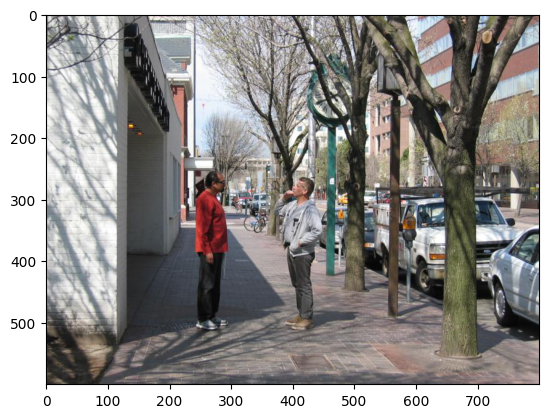

In [7]:
%reload_ext autoreload
%autoreload 2


from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the image
image_path = "crepe_data/VG_100K/1.jpg"
image = mpimg.imread(image_path)

# plt.title("Sheep Image")
# plt.xlabel("X pixel scaling")
# plt.ylabel("Y pixel scaling")
plt.imshow(image)
plt.show()

In [2]:
img_caption_file_name="crepe_data/prod_hard_negatives/prod_vg_hard_negs_swap_all.csv"

import pandas as pd
 
caption_pd = pd.read_csv(img_caption_file_name)

In [10]:
print(caption_pd.iloc[4]['caption'], caption_pd.iloc[4]['image_id'])
print(caption_pd.iloc[3]['caption'], caption_pd.iloc[3]['image_id'])

a drinking bottle with a lid and handle, on a granite 6
a glass of water on a counter with an apple, a bag of food, and a chair with a leg. 6


In [5]:
len(caption_pd)

7405

In [2]:
from image_utils import load_crepe_datasets, load_other_crepe_images
import os

data_path="/data2/wuyinjun/"
dataset_name="crepe"
full_data_path = os.path.join(data_path, dataset_name)

queries, raw_img_ls, sub_queries_ls, img_idx_ls = load_crepe_datasets(full_data_path)
img_idx_ls, raw_img_ls = load_other_crepe_images(full_data_path, img_idx_ls, raw_img_ls)

In [3]:
import torch
from transformers import CLIPModel, AutoProcessor
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# processor = ViTImageProcessor.from_pretrained('google/vit-large-patch16-224')
# model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-224').to(device)
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
# processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
raw_processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
# processor =  lambda images: raw_processor(images=images, return_tensors="pt", padding=False, do_resize=False, do_center_crop=False)["pixel_values"]
processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
text_processor =  lambda text: raw_processor(text=[text], return_tensors="pt", padding=True, truncation=True)
img_processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
model = model.eval()

In [6]:
from image_utils import *

cl = ConceptLearner(raw_img_ls, model, vit_forward, processor, dataset_name, device)

patch_count=4

img_emb, patch_emb, masks, bboxes, img_per_patch = cl.get_patches(patch_count, images=raw_img_ls, method="slic", compute_img_emb=True)

# img_emb, patch_emb_ls, masks_ls, bboxes_ls, img_per_patch_ls = convert_samples_to_concepts(args, model, raw_img_ls, processor, device, patch_count_ls=patch_count_ls)




NameError: name 'vit_forward' is not defined